# Data understanding and Exploratory analysis (EDA)
## Topic: Examining the ecological processes influencing the assembly of molecules into OM assemblages


Dataset: 2 April 2022 from GDrive
Water with Jaccard 

## Data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_theme()

In [2]:
# Load dataset
fn_water = "../Dataset/Water_Prevalence_10__commat_2021-09-29_Jaccard.csv"
df_water = pd.read_csv(fn_water)
print('Water: ' + str(df_water.shape))

# Data quality check
print(df_water.columns.nunique())

# Join datasets
df = df_water.copy()

# Check if there is any identical columns / CF across all samples
print("Duplicated column: " + str(df.columns.duplicated().any()))

# Pre-processing
df = df.rename(columns={"Unnamed: 0": "sample_id"})
df = df.set_index("sample_id").fillna(0).reset_index()

# For analysis
sw = df_water.rename(columns={"Unnamed: 0": "sample_id"}).set_index("sample_id")
print("Shape:" + str(sw.shape))

print(df.shape)
df.head()

Water: (265, 266)
266
Duplicated column: False
Shape:(265, 265)
(265, 266)


,sample_id,SW_S19S.0003_U_1,SW_S19S.0003_U_2,SW_S19S.0003_U_3,SW_S19S.0004_U_1,SW_S19S.0004_U_2,SW_S19S.0004_U_3,SW_S19S.0005_U_1,SW_S19S.0005_U_2,SW_S19S.0005_U_3,...,SW_S19S.0097_U_2,SW_S19S.0097_U_3,SW_S19S.0098_U_1,SW_S19S.0098_U_2,SW_S19S.0098_U_3,SW_S19S.0099_U_1,SW_S19S.0099_U_2,SW_S19S.0099_U_3,SW_S19S.0100_U_1,SW_S19S.0100_U_3
0,SW_S19S.0003_U_1,0.000000,0.355727,0.336476,0.322602,0.347937,0.330517,0.396684,0.390567,0.391726,...,0.427941,0.440325,0.453488,0.460775,0.498927,0.439427,0.435175,0.459696,0.519608,0.338761
1,SW_S19S.0003_U_2,0.355727,0.000000,0.282867,0.285123,0.275413,0.281410,0.373414,0.384390,0.387787,...,0.369915,0.397099,0.367101,0.353041,0.432471,0.423841,0.413348,0.446696,0.530916,0.292954
2,SW_S19S.0003_U_3,0.336476,0.282867,0.000000,0.254438,0.258015,0.247882,0.346588,0.369463,0.362126,...,0.361528,0.437520,0.390221,0.389064,0.480366,0.454700,0.414222,0.480292,0.569069,0.338183
3,SW_S19S.0004_U_1,0.322602,0.285123,0.254438,0.000000,0.240495,0.242188,0.342504,0.377984,0.373810,...,0.372035,0.443845,0.399272,0.407316,0.486757,0.431098,0.391906,0.465633,0.572718,0.334084
4,SW_S19S.0004_U_2,0.347937,0.275413,0.258015,0.240495,0.000000,0.220025,0.332399,0.362706,0.360607,...,0.357362,0.429251,0.391659,0.394052,0.480732,0.433616,0.395042,0.462075,0.574074,0.333227


## PCA on the features (Jaccard index)

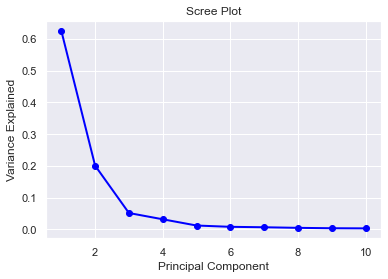

In [3]:
# Dimensionality reduction
from sklearn.decomposition import PCA
n = 10

#define PCA model to use
pca = PCA(n_components=n)

#fit PCA model to data
pca_fit = pca.fit(sw)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Text(0, 0.5, 'Cumulative explained variance')

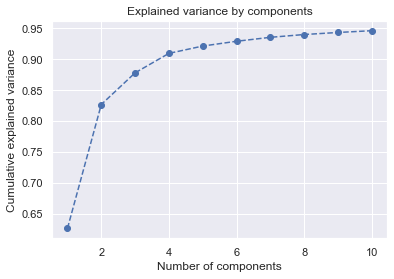

In [4]:
plt.plot(range(1,n+1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Distortion ; Inertias ; Silhouette


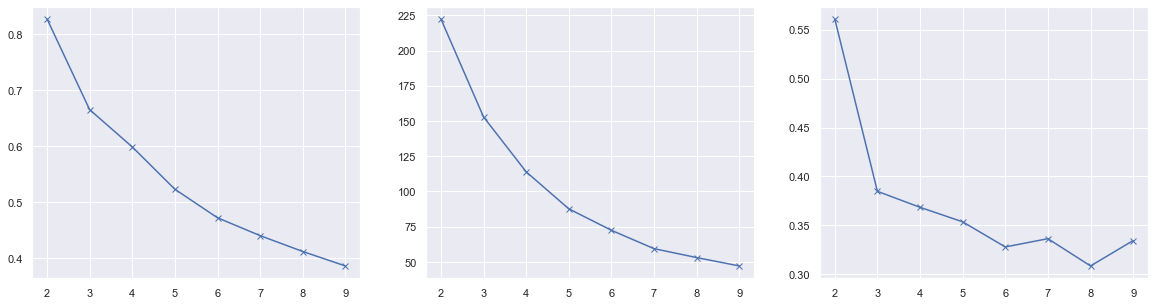

In [5]:
from sklearn import cluster
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

# Select n PCs based on scree plot
npc = 3

# PCA
pca = PCA(n_components=npc)
pca_fit = pca.fit(sw)
X = pca.transform(sw)

distortions = []
inertias = []
sil = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    sil.append(silhouette_score(X, kmeanModel.labels_, metric = 'euclidean'))
    
f, axs = plt.subplots(1,3, figsize=(20,5))
print("Distortion ; Inertias ; Silhouette")
axs[0].plot(K, distortions, 'bx-')
axs[1].plot(K, inertias, 'bx-')
axs[2].plot(K, sil, 'bx-')

# Hierachical Clustering on PCs

Text(0.5, 1.0, 'Dendrograms')

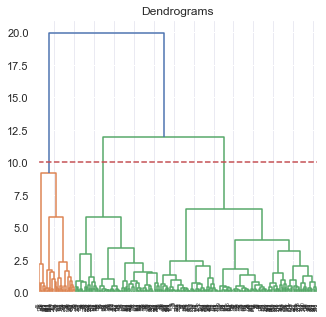

In [6]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(5, 5))
dendogram = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=10, color='r', linestyle='--')
plt.title("Dendrograms")  

# Unsupervised k-Means Clustering

In [7]:
# Based on the plots decide k = 3
k = 3

In [8]:
kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X)
kmeanModel.fit(X)
distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
inertias.append(kmeanModel.inertia_)

from sklearn import metrics
metrics.silhouette_score(X, kmeanModel.labels_, metric='euclidean')

0.3848675506065386

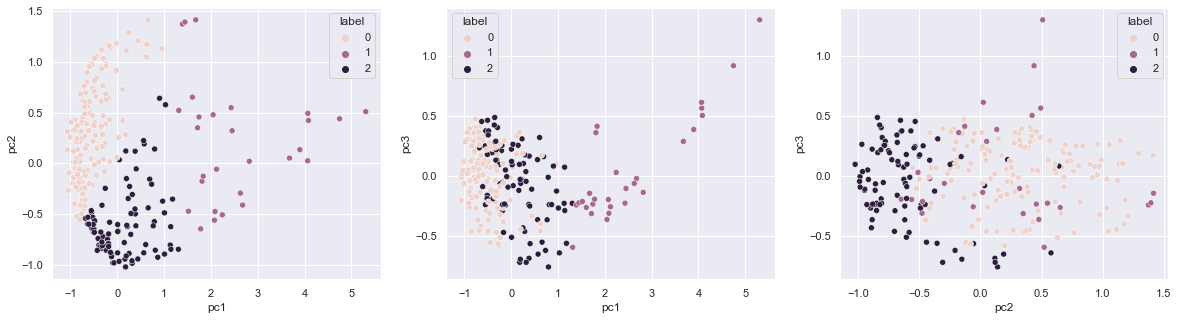

In [9]:
# Visualise
sw_pca_kmeans = pd.concat([sw.reset_index(), pd.DataFrame(X)], axis=1)
sw_pca_kmeans.columns.values[-npc:] = ['pc1','pc2', 'pc3'] 
sw_pca_kmeans['label'] = kmeanModel.labels_

# Plots
f, axs = plt.subplots(1, 3, figsize=(20,5))
sns.scatterplot(sw_pca_kmeans['pc1'], sw_pca_kmeans['pc2'], hue = sw_pca_kmeans['label'], ax=axs[0])
sns.scatterplot(sw_pca_kmeans['pc1'], sw_pca_kmeans['pc3'], hue = sw_pca_kmeans['label'], ax=axs[1])
sns.scatterplot(sw_pca_kmeans['pc2'], sw_pca_kmeans['pc3'], hue = sw_pca_kmeans['label'], ax=axs[2])
plt.show()

In [10]:
# Number of observation per cluster
results = sw.copy()
results['label'] = kmeanModel.labels_

results['cluster'] = np.nan
results.loc[results['label'] == 0, "cluster"] = 'Most'
results.loc[results['label'] == 1, "cluster"] = 'Least'
results.loc[results['label'] == 2, "cluster"] = 'Average'

results["cluster"].value_counts()

Most       147
Average     90
Least       28
Name: cluster, dtype: int64

In [11]:
# Get CF
sw = pd.read_csv('sw_for_clustering.csv')
sw = sw.set_index('sample_id')
sw['cluster'] = results['cluster']

# Presence of CF per cluster
temp = sw.groupby("cluster").any()
temp.sum(axis=1)

cluster
Average    4476
Least      3671
Most       4563
dtype: int64

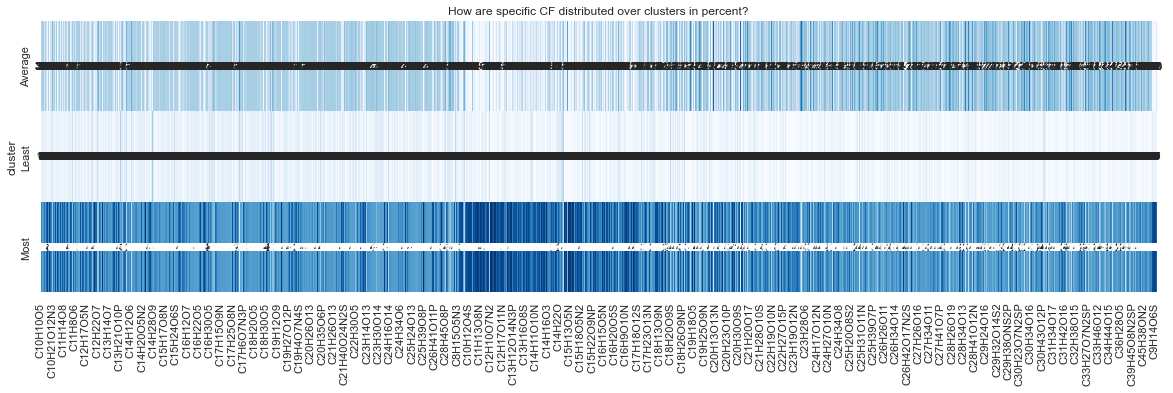

In [12]:
# Plot distribution of CF over clusters
grouped_targets = sw.groupby('cluster').sum() / sw.drop('cluster', axis=1).sum(axis=0) * 100
grouped_targets = grouped_targets.apply(np.round).astype(np.int32)
plt.figure(figsize=(20,5))
sns.heatmap(grouped_targets, cmap="Blues", annot=True, fmt="g", cbar=False);
plt.title("How are specific CF distributed over clusters in percent?");

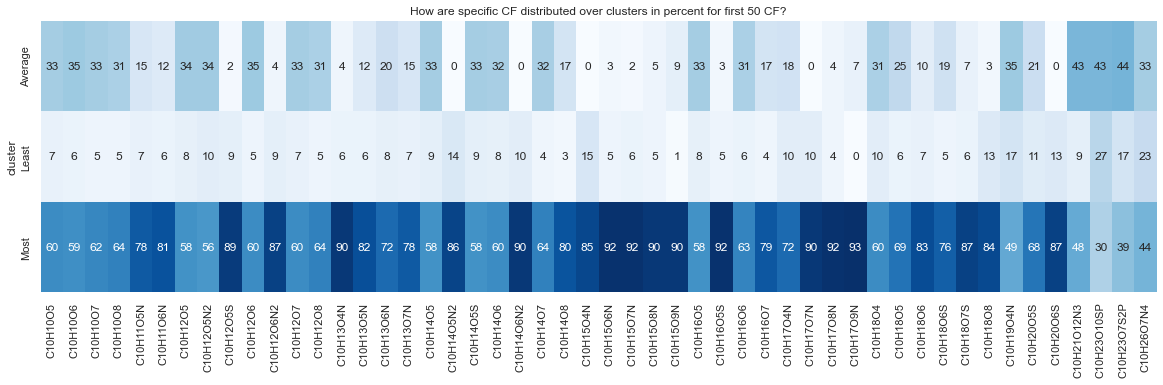

In [13]:
plt.figure(figsize = (20,5))
sns.heatmap(grouped_targets.iloc[:,:50], cmap="Blues", annot=True, fmt="g", cbar=False);
plt.title("How are specific CF distributed over clusters in percent for first 50 CF?");

## Prominent CFs in each cluster

(21, 4)
(20, 4)
(21, 4)
(62, 4)
Top unique CFs:(62, 4)


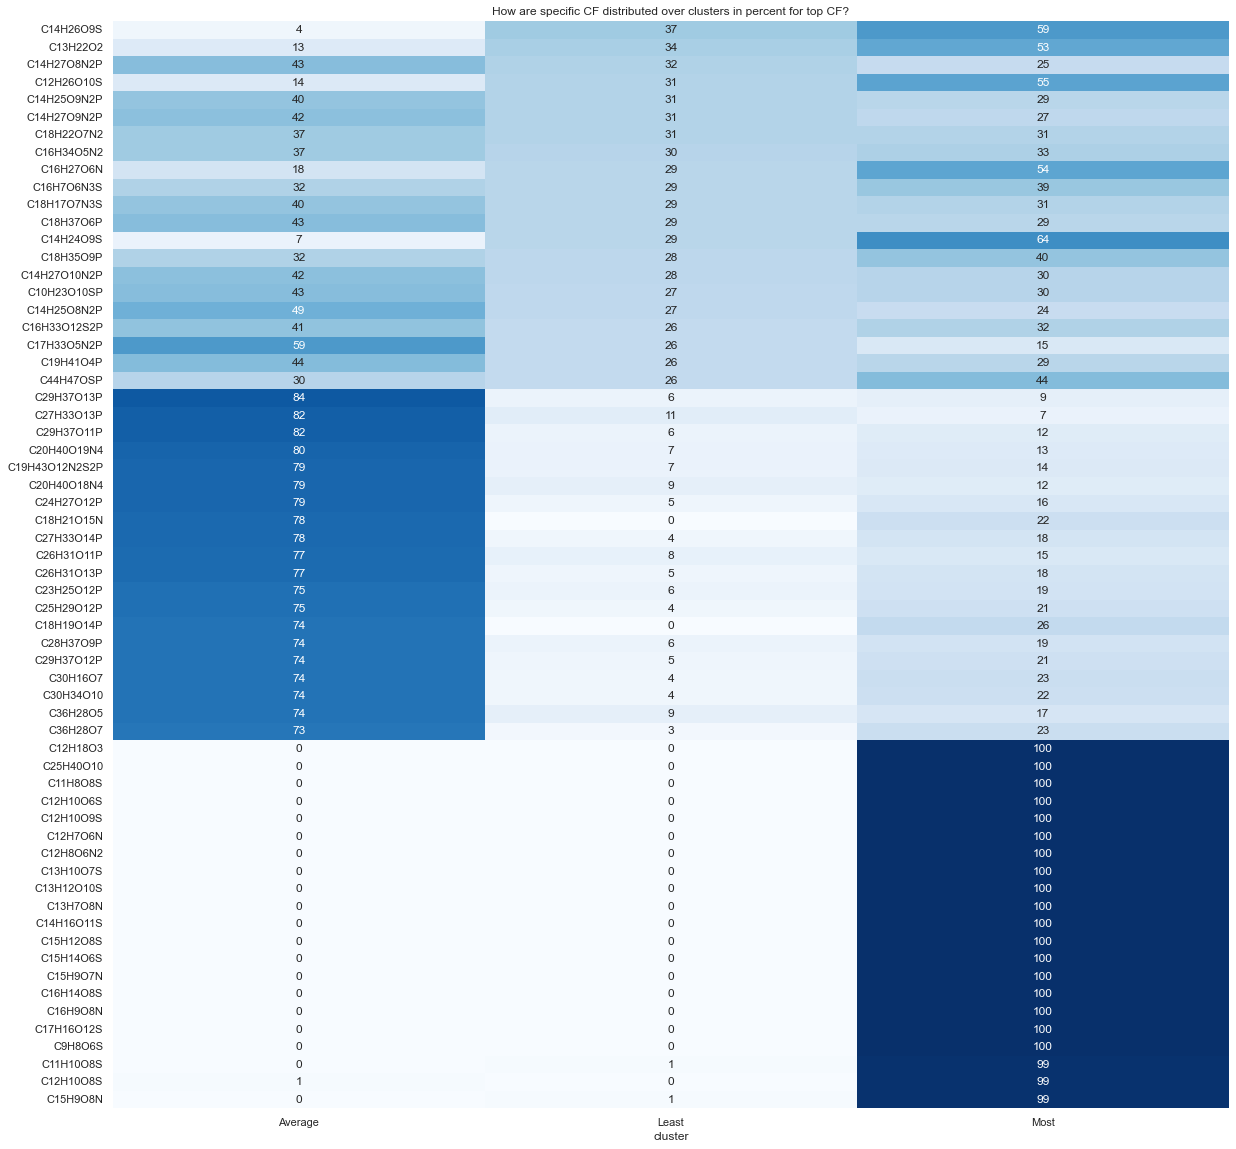

In [44]:
## Top 10 CFs in each cluster
colname = ['Least','Average','Most']
top_cf = pd.DataFrame()

for i in colname:
    temp = grouped_targets.T.nlargest(20, i, keep='all')
    temp['label'] = i
    print(temp.shape)
    top_cf = top_cf.append(temp)
    

print(top_cf.shape)
top_cf = top_cf[~top_cf.index.duplicated(keep='first')]
print('Top unique CFs:' + str(top_cf.shape))

plt.figure(figsize = (20,20))
sns.heatmap(top_cf[['Average','Least','Most']], cmap="Blues", annot=True, fmt="g", cbar=False);
plt.title("How are specific CF distributed over clusters in percent for top CF?");

## Check Class of CFs by cluster

In [45]:
crosstab = pd.read_csv('../Dataset/Water_Prevalence_10_crosstable_2021-09-29.csv')
crosstab = crosstab.rename(columns={"Unnamed: 0": "cluster"}).set_index("cluster")
top_cf = top_cf.join(crosstab)

In [46]:
pd.set_option('display.max_rows', None)
top_cf[['Average','Least','Most','label','Class','bs1_class','bs2_class','bs3_class']].head(70)

,Average,Least,Most,label,Class,bs1_class,bs2_class,bs3_class
C14H26O9S,4,37,59,Least,AminoSugar,Other,Amino Sugar,Other
C13H22O2,13,34,53,Least,Lipid,Lipid,Lipid,Other
C14H27O8N2P,43,32,25,Least,AminoSugar,Other,Amino Sugar,Protein
C12H26O10S,14,31,55,Least,Carb,Other,Carbohydrate,Carbohydrate
C14H25O9N2P,40,31,29,Least,AminoSugar,Amino Sugar,Amino Sugar,Amino Sugar
C14H27O9N2P,42,31,27,Least,AminoSugar,Other,Amino Sugar,Amino Sugar
C18H22O7N2,37,31,31,Least,Lignin,Lignin,Lignin,Other
C16H34O5N2,37,30,33,Least,Protein,Other,Protein,Other
C16H27O6N,18,29,54,Least,Protein,Protein,Protein,Other
C16H7O6N3S,32,29,39,Least,ConHC,Cond Hydrocarbon,Cond Hydrocarbon,Other


# Cluster and metadata analysis

In [51]:
di = pd.read_csv('../Dataset/water_merged_indices.csv')
di.rename(columns = {'Unnamed: 0':'sample_id','Sorensen':'sorensen','Richness observed':'alpha', 
                     'Simpson\'s Diversity Index':'simpson'}, inplace = True)
di = di.set_index('sample_id')
di = di[['alpha','simpson']]
df = sw[['cluster']].join(di,how='left')

## Cluster and metadata
di = pd.read_csv('../Dataset/FTICR_meta_all_2021-09-29.csv').set_index('ID')
df = df.join(di,how='left')

temp = pd.read_csv('water_site_class.csv').set_index('Unnamed: 0')
df = df.join(temp,how='left')
df.head()

,cluster,alpha,simpson,river.id,sample.type,location.id,sampling.type,replicate.id,original.id,Date,...,F_mgL,AminoSugar,Carb,ConHC,Lignin,Lipid,Other,Protein,Tannin,UnsatHC
sample_id,,,,,,,,,,,,,,,,,,,,,
SW_S19S.0003_U_1,Average,2335,0.999572,S19S.0003,SW,U,NaN,1.0,S19S_0003_ICR.1_p05,8-Sep-19,...,0.07,89.0,32.0,280.0,1276.0,37.0,8.0,230.0,367.0,16.0
SW_S19S.0003_U_2,Average,2560,0.999609,S19S.0003,SW,U,NaN,2.0,S19S_0003_ICR.2_p05,8-Sep-19,...,0.07,90.0,33.0,272.0,1421.0,51.0,15.0,273.0,382.0,23.0
SW_S19S.0003_U_3,Most,2782,0.999641,S19S.0003,SW,U,NaN,3.0,S19S_0003_ICR.3_p05,8-Sep-19,...,0.06,79.0,39.0,346.0,1544.0,37.0,12.0,241.0,462.0,22.0
SW_S19S.0004_U_1,Most,2823,0.999646,S19S.0004,SW,U,NaN,1.0,S19S_0004_ICR.1_p05,8-Sep-19,...,0.07,103.0,39.0,317.0,1517.0,46.0,8.0,301.0,465.0,27.0
SW_S19S.0004_U_2,Most,2869,0.999651,S19S.0004,SW,U,NaN,2.0,S19S_0004_ICR.2_p05,8-Sep-19,...,0.08,100.0,45.0,311.0,1578.0,46.0,12.0,287.0,462.0,28.0


In [67]:
temp = df[list(['cluster']) + list(temp.columns)]
temp.to_csv('temp2.csv')

In [ ]:
## Finding: CFs are distributed across sites in similar manner e.g. all sites are dominated by lignin class, followed by Tannin, Protein, ConHC etc....

In [16]:
df.describe(include=[np.number])

,alpha,simpson,replicate.id,Stream_Order,Distance_DS.and.MS_meters,Distance_MS.and.US_meters,Latitude_dec.deg,Longitude_dec.deg,Gauge_Latitude_dec.deg,Gauge_Longitude_dec.deg,...,resp.r2,resp.pval,NPOC_mg.L.asC,del2H_permil,del18O_permil,Cl_mgL,SO4_mgL,NO3_mgL,NO2_mgL,F_mgL
count,265.000000,265.000000,265.000000,227.000000,265.000000,265.000000,0.0,0.0,191.000000,191.000000,...,0.0,0.0,265.000000,83.000000,83.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,2614.120755,0.999593,2.000000,3.484581,22.742264,23.331774,NaN,NaN,41.098569,-95.040557,...,NaN,NaN,2.697472,-67.207229,-9.570482,70.882624,28.047605,3.767414,0.059772,0.124030
std,518.493667,0.000134,0.816497,2.329777,19.565756,21.675815,NaN,NaN,7.304649,30.970834,...,NaN,NaN,2.656359,41.534945,5.063865,386.395093,68.031675,9.328119,0.142871,0.157353
min,718.000000,0.998607,1.000000,1.000000,3.500000,5.000000,NaN,NaN,18.275444,-149.403330,...,NaN,NaN,0.450000,-142.400000,-18.750000,0.160000,0.160000,0.120000,0.040000,0.020000
25%,2408.000000,0.999585,1.000000,1.000000,10.000000,10.000000,NaN,NaN,37.131315,-119.025440,...,NaN,NaN,1.160000,-111.000000,-14.440000,1.290000,3.495000,0.120000,0.040000,0.050000
50%,2683.000000,0.999627,2.000000,3.000000,15.000000,16.000000,NaN,NaN,40.664530,-105.224214,...,NaN,NaN,1.840000,-57.500000,-8.120000,6.530000,9.860000,0.390000,0.040000,0.080000
75%,2991.000000,0.999666,3.000000,5.500000,27.000000,29.000000,NaN,NaN,44.208517,-81.036700,...,NaN,NaN,3.000000,-34.250000,-5.730000,20.310000,23.060000,2.900000,0.040000,0.140000
max,3424.000000,0.999708,3.000000,8.000000,116.000000,161.000000,NaN,NaN,68.642780,13.625610,...,NaN,NaN,15.060000,8.300000,0.720000,3964.300000,561.170000,53.650000,1.480000,1.310000


## Diversity indices

<AxesSubplot:xlabel='cluster', ylabel='simpson'>

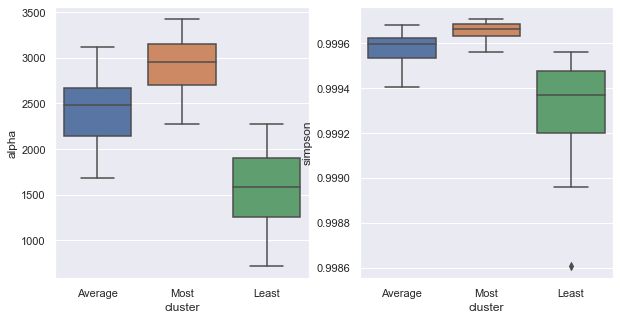

In [17]:
# Relationship between indices and cluster (numerical vs categorical)
sns.set(rc={'figure.figsize':(10,5)})
f,(ax1,ax2) = plt.subplots(1,2)

sns.boxplot(x='cluster', y='alpha', data=df, orient='v',ax=ax1)
sns.boxplot(x='cluster', y='simpson', data=df, orient='v',ax=ax2)

## Metadata

'NPOC_mg.L.asC', 'del2H_permil', 'del18O_permil', 'Cl_mgL', 'SO4_mgL', 'NO3_mgL', 'NO2_mgL', 'F_mgL'

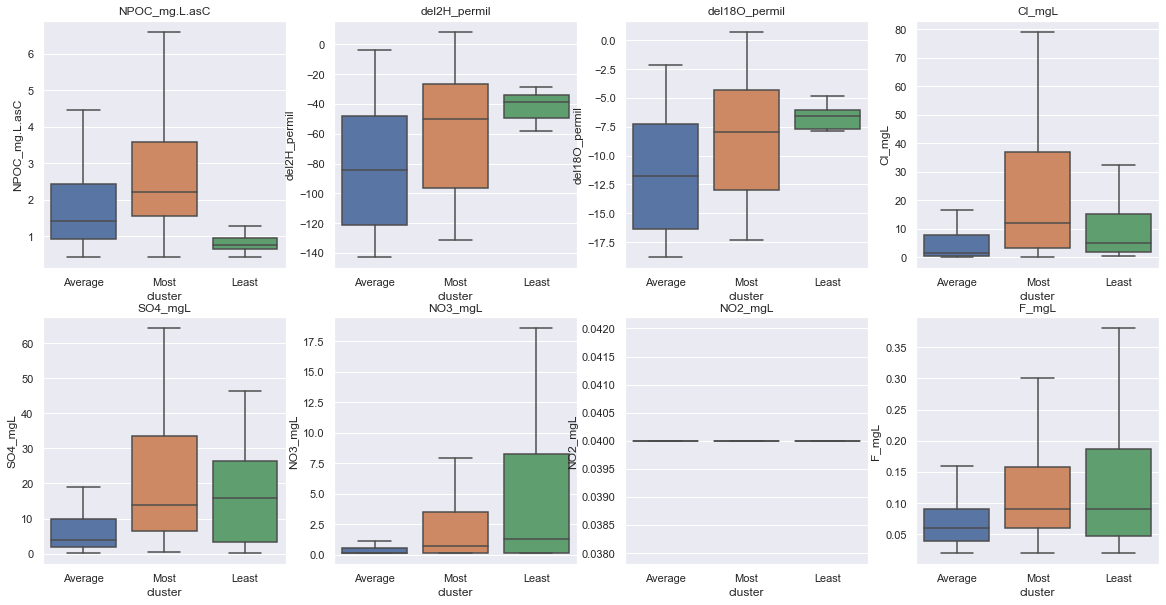

In [18]:
# Relationship with cluster (numerical vs categorical)
colname = ['NPOC_mg.L.asC', 'del2H_permil', 'del18O_permil', 'Cl_mgL', 'SO4_mgL', 'NO3_mgL', 'NO2_mgL', 'F_mgL']
sns.set(rc={'figure.figsize':(20,10)})
f,axs = plt.subplots(2,4)
axs = axs.ravel()

cnt = 0
for i in colname:
    sns.boxplot(x='cluster', y=i, data=df, orient='v', ax=axs[cnt], showfliers = False).set_title(i)
    cnt = cnt + 1

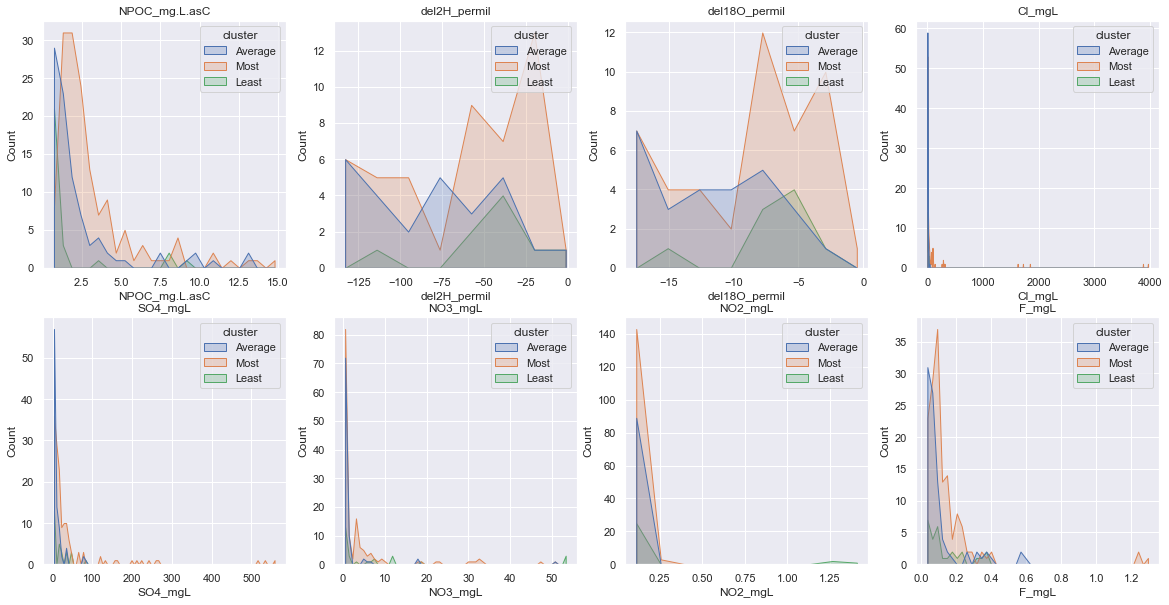

In [19]:
# Relationship with cluster (numerical vs categorical)
colname = ['NPOC_mg.L.asC', 'del2H_permil', 'del18O_permil', 'Cl_mgL', 'SO4_mgL', 'NO3_mgL', 'NO2_mgL', 'F_mgL']
sns.set(rc={'figure.figsize':(20,10)})
f,axs = plt.subplots(2,4)
axs = axs.ravel()

cnt = 0
for i in colname:
    sns.histplot(data=df, x=i, ax=axs[cnt], hue='cluster',  element="poly").set_title(i)
    cnt = cnt + 1

In [21]:
df.to_csv('Jaccard_pca_kmeans_clusters.csv')